In [1]:
import pandas as pd

df = pd.read_csv('translated_russian.csv')

In [2]:
df

,Unnamed: 0,text
0,1143139,russian invasion in ukraine ukraine invasion k...
1,1143146,russian surrender it makes no sense to die for...
2,1143405,morgenshterh give me a kick durov why doesn't ...
3,1143443,microdistrict danilovka explosion video danilo...
4,1143509,kyiv ukraine ukraine do not plan to evacuate t...
...,...,...
17714,980987,блядьське нато ну не быть гнидой nato close th...
17715,981074,"in kharkiv, the building of the regional polic..."
17716,981157,ukraine received another batch of javelins fro...
17717,981206,"Russians, according to the most modest data fo..."


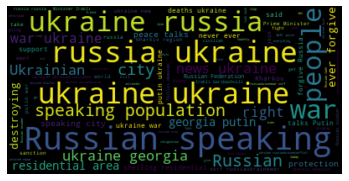

In [3]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud 
import matplotlib.pyplot as plt
# Create stopword list:
stop_words = set(stopwords.words('english'))
textt = " ".join(review for review in df.text)
wordcloud = WordCloud(stopwords=stop_words).generate(textt)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud11.png')
plt.show()

In [4]:
textt

'russian invasion in ukraine ukraine invasion kharkov danilovka district footage of the fire after the explosion russian surrender it makes no sense to die for Putin\'s palaces and yachts they won\'t kill you and they will feed you well even let your mother call ukrainewar ukrainerussia news putin swift russia moscow war ukraine india france london uk usa japan brazil morgenshterh give me a kick durov why doesn\'t he ban in the cart channels calling to put marks for blows and other pro-Kremlin whores stoprussia ukraine helpukraine microdistrict danilovka explosion video danilovka microdistrict ukrainerussiawar ukrainerussia stoprussianaggression standwithukraine poutine prayforukraine ukraine ukrainewar ukrania kyiv ukraine ukraine do not plan to evacuate the population from vasylkiv "there is no threat to people" - speaker of the state emergency service of the kiev region victoria ruban if, after the last nights of defense, someone says that Ukraine does not meet NATO standards, then 

In [5]:
## Running sentiment analyser
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download()
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/preetigupta/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [6]:
sid


In [7]:
df['scores'] = df['text'].apply(lambda review: sid.polarity_scores(review))

df.head()

,Unnamed: 0,text,scores
0,1143139,russian invasion in ukraine ukraine invasion k...,"{'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'comp..."
1,1143146,russian surrender it makes no sense to die for...,"{'neg': 0.18, 'neu': 0.683, 'pos': 0.137, 'com..."
2,1143405,morgenshterh give me a kick durov why doesn't ...,"{'neg': 0.129, 'neu': 0.776, 'pos': 0.095, 'co..."
3,1143443,microdistrict danilovka explosion video danilo...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,1143509,kyiv ukraine ukraine do not plan to evacuate t...,"{'neg': 0.233, 'neu': 0.767, 'pos': 0.0, 'comp..."


In [8]:
df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])

df.head()

,Unnamed: 0,text,scores,compound
0,1143139,russian invasion in ukraine ukraine invasion k...,"{'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'comp...",-0.3400
1,1143146,russian surrender it makes no sense to die for...,"{'neg': 0.18, 'neu': 0.683, 'pos': 0.137, 'com...",-0.5207
2,1143405,morgenshterh give me a kick durov why doesn't ...,"{'neg': 0.129, 'neu': 0.776, 'pos': 0.095, 'co...",-0.2677
3,1143443,microdistrict danilovka explosion video danilo...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
4,1143509,kyiv ukraine ukraine do not plan to evacuate t...,"{'neg': 0.233, 'neu': 0.767, 'pos': 0.0, 'comp...",-0.8020


In [9]:
df['comp_score'] = df['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

df.head()

,Unnamed: 0,text,scores,compound,comp_score
0,1143139,russian invasion in ukraine ukraine invasion k...,"{'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'comp...",-0.3400,neg
1,1143146,russian surrender it makes no sense to die for...,"{'neg': 0.18, 'neu': 0.683, 'pos': 0.137, 'com...",-0.5207,neg
2,1143405,morgenshterh give me a kick durov why doesn't ...,"{'neg': 0.129, 'neu': 0.776, 'pos': 0.095, 'co...",-0.2677,neg
3,1143443,microdistrict danilovka explosion video danilo...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
4,1143509,kyiv ukraine ukraine do not plan to evacuate t...,"{'neg': 0.233, 'neu': 0.767, 'pos': 0.0, 'comp...",-0.8020,neg


In [16]:
ukrainian_keywords = ['standwithukraine', 'stoprussianaggression', 'putinisawarcriminal', 'saveukraine',
'freenavalny', 'fckputin', 'stopputin']

russian_keywords = ['istandwithputin', 'istandwithrussia', 'standwithrussia', 'standwithputin', 'stopnato',
'indiastandswithrussia', ' z ', 'surrenderukraine']



from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def vader_sentiment_result(sent):
    scores = analyzer.polarity_scores(sent)
    
    if scores["neg"] > scores["pos"]:
        return -1

    return 1

In [17]:


# 1 is pro russia, -1 is pro ukriane
def make_labels(x):
  x = x.lower()
  russian_keywords_count = 0
  ukrainian_keywords_count = 0 

  # Counting occurences of keywords in the text
  for russian_keyword in russian_keywords:
    russian_keywords_count += x.count(russian_keyword)
  for ukrainian_keyword in ukrainian_keywords:
    ukrainian_keywords_count += x.count(ukrainian_keyword)

  # Determine Label 
  if russian_keywords_count > ukrainian_keywords_count:
    label = 1
  else:
    label = -1

  sentiment_value = vader_sentiment_result(x)

  final_label =  "Pro-Russia" if label * sentiment_value > 0 else "Pro-Ukraine"
  
  return final_label
  


In [19]:
print(make_labels("it's just me that kremlinrussia is acting weird now if you suspect he's a psycho please say it right now for god's sake you should do something putin ukraineunderattack ukrainerussia"))



Pro-Russia


In [10]:
df.to_csv('sentiment_translated_russian.csv')  